In [1]:
from keras.layers import Convolution2D, MaxPooling2D, Activation, Conv2D
from keras.models import Sequential
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2  
import os
%matplotlib inline

Using TensorFlow backend.


### Visualization function

In [17]:
import keras.backend as K


def get_activations(model, model_inputs, print_shape_only=False, layer_name=None):
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(0.)
    else:
        list_inputs = [model_inputs, 0.]

    # Learning phase. 0 = Test mode (no dropout or batch normalization)
    # layer_outputs = [func([model_inputs, 0.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations


def display_activations(activation_maps):
    import numpy as np
    import matplotlib.pyplot as plt
    """
    (1, 26, 26, 32)
    (1, 24, 24, 64)
    (1, 12, 12, 64)
    (1, 12, 12, 64)
    (1, 9216)
    (1, 128)
    (1, 128)
    (1, 10)
    """
    batch_size = activation_maps[0].shape[0]
    assert batch_size == 1, 'One image at a time to visualize.'
    for i, activation_map in enumerate(activation_maps):
        print('Displaying activation map {}'.format(i))
        shape = activation_map.shape
        if len(shape) == 4:
            activations = np.hstack(np.transpose(activation_map[0], (2, 0, 1)))
        elif len(shape) == 2:
            # try to make it square as much as possible. we can skip some activations.
            activations = activation_map[0]
            num_activations = len(activations)
            if num_activations > 1024:  # too hard to display it on the screen.
                square_param = int(np.floor(np.sqrt(num_activations)))
                activations = activations[0: square_param * square_param]
                activations = np.reshape(activations, (square_param, square_param))
            else:
                activations = np.expand_dims(activations, axis=0)
        else:
            raise Exception('len(shape) = 3 has not been implemented.')
        plt.imshow(activations, interpolation='None', cmap='jet')
        plt.show()

In [ ]:
# samples folder should be in the same location as this notebook
if not os.path.exists(samples):
        raise('No JPEGImages folder found')

In [7]:
samples = list(glob('samples/*.jpg'))

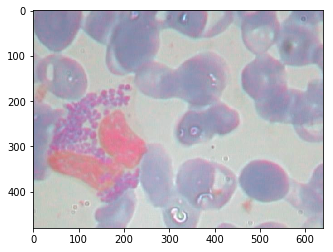

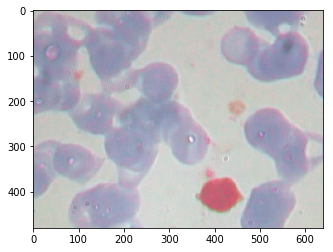

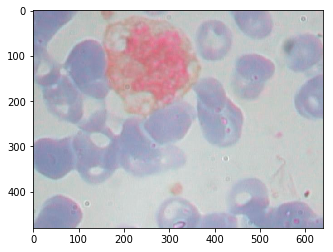

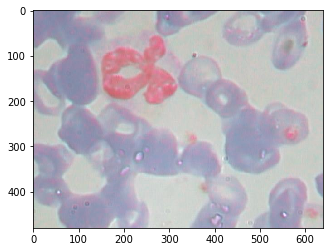

In [8]:
for sample in samples:
    img = cv2.imread(sample)
    plt.imshow(img)
    plt.show()

In [60]:
#Parameters
# shape of images:
shape = (480, 640, 3)
# number of filters in the layers
x=3

### Layers:
- C -> Convolution Layer
- R -> ReLU Activation Layer
- P -> Max Pooling Layer

### [ C + R + P ] * 2 

In [65]:
model3 = Sequential()
model3.add(Conv2D(x,(3,3),
                        input_shape=shape))

model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(x,(3,3),
                        input_shape=shape))

model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

In [69]:
models = {'model3':model3}

EOSINOPHIL_009.jpg
model3
----- activations -----
(1, 478, 638, 3)
(1, 478, 638, 3)
(1, 239, 319, 3)
(1, 237, 317, 3)
(1, 237, 317, 3)
(1, 118, 158, 3)
Displaying activation map 0


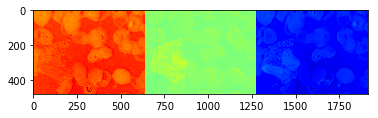

Displaying activation map 1


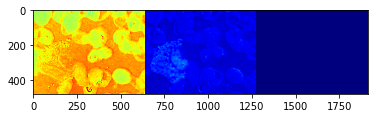

Displaying activation map 2


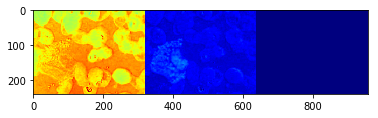

Displaying activation map 3


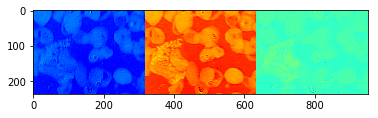

Displaying activation map 4


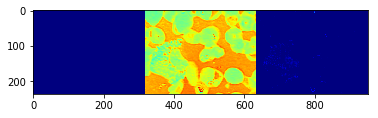

Displaying activation map 5


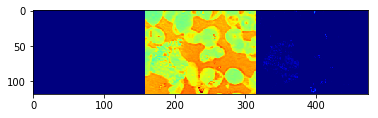

LYMPHOCYTE_020.jpg
model3
----- activations -----
(1, 478, 638, 3)
(1, 478, 638, 3)
(1, 239, 319, 3)
(1, 237, 317, 3)
(1, 237, 317, 3)
(1, 118, 158, 3)
Displaying activation map 0


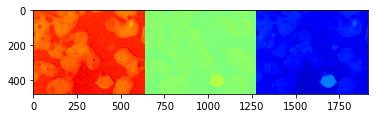

Displaying activation map 1


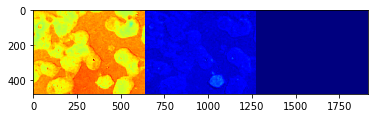

Displaying activation map 2


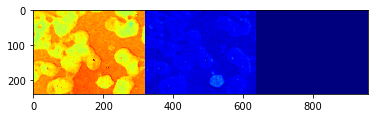

Displaying activation map 3


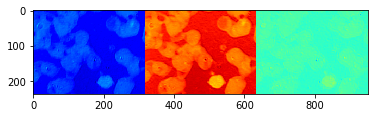

Displaying activation map 4


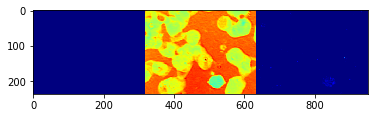

Displaying activation map 5


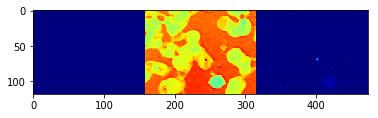

MONOCYTE_015.jpg
model3
----- activations -----
(1, 478, 638, 3)
(1, 478, 638, 3)
(1, 239, 319, 3)
(1, 237, 317, 3)
(1, 237, 317, 3)
(1, 118, 158, 3)
Displaying activation map 0


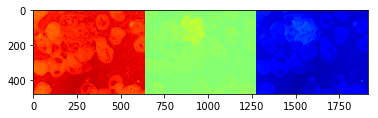

Displaying activation map 1


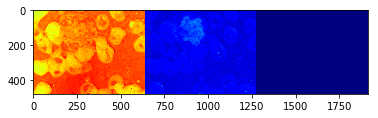

Displaying activation map 2


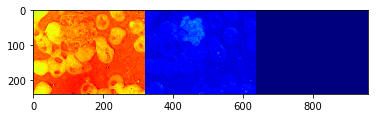

Displaying activation map 3


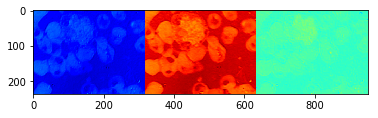

Displaying activation map 4


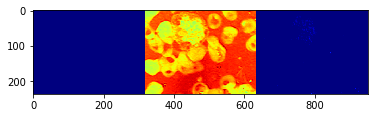

Displaying activation map 5


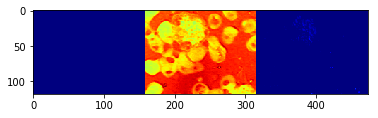

NEUTROPHIL_003.jpg
model3
----- activations -----
(1, 478, 638, 3)
(1, 478, 638, 3)
(1, 239, 319, 3)
(1, 237, 317, 3)
(1, 237, 317, 3)
(1, 118, 158, 3)
Displaying activation map 0


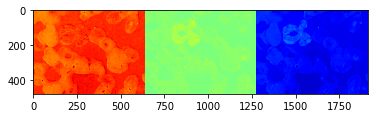

Displaying activation map 1


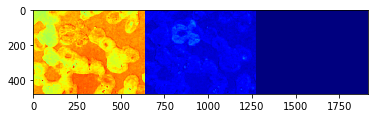

Displaying activation map 2


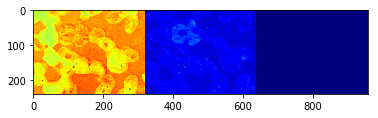

Displaying activation map 3


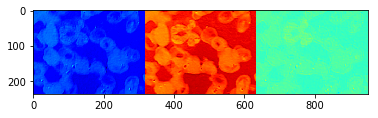

Displaying activation map 4


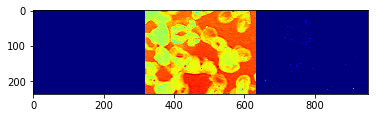

Displaying activation map 5


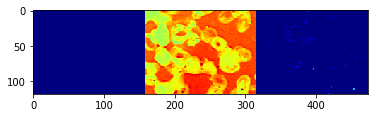

In [70]:
for sample in samples:
    for model_name,model in models.items():
        print(sample[8:])
        print(model_name)
        img2 = cv2.imread(sample)
        img2 = np.expand_dims(img2,axis=0)/255
        a=get_activations(model, img2, print_shape_only=True)
        display_activations(a)
        
        plt.show()